In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


# 사용 칼럼 지정

In [2]:
# 데이터 불러오기
building = pd.read_csv("데이터/주택종류별+주택-+읍면동(연도+끝자리+0,5),+시군구(그+외+연도)_20230809142859.csv",header=2)
building # 2020년

,동별(1),동별(2),동별(3),소계,단독주택,단독주택.1,단독주택.2,단독주택.3,아파트,연립주택,다세대주택,비거주용건물내주택
0,동별(1),동별(2),동별(3),소계,소계,일반단독주택,다가구주택,영업겸용주택,소계,소계,소계,소계
1,서울시,종로구,사직동,2778,650,467,108,75,1591,78,411,48
2,서울시,종로구,삼청동,730,644,414,134,96,X,19,37,30
3,서울시,종로구,부암동,3070,1033,750,214,69,121,903,976,37
4,서울시,종로구,평창동,5958,1553,1088,314,151,1009,2186,1139,71
...,...,...,...,...,...,...,...,...,...,...,...,...
421,서울시,강동구,둔촌1동,5,5,X,X,X,X,X,X,X
422,서울시,강동구,둔촌2동,7962,543,31,377,135,5011,154,2187,67
423,서울시,강동구,암사1동,10089,1139,20,889,230,2790,247,5829,84
424,서울시,강동구,천호2동,9362,1488,103,1134,251,2641,189,4901,143


In [3]:
# 사용할 칼럼만 지정
building = building[['동별(3)','소계','단독주택','아파트','연립주택','다세대주택','비거주용건물내주택']]
building = building.drop(0)
building

,동별(3),소계,단독주택,아파트,연립주택,다세대주택,비거주용건물내주택
1,사직동,2778,650,1591,78,411,48
2,삼청동,730,644,X,19,37,30
3,부암동,3070,1033,121,903,976,37
4,평창동,5958,1553,1009,2186,1139,71
5,무악동,2860,48,2703,55,46,8
...,...,...,...,...,...,...,...
421,둔촌1동,5,5,X,X,X,X
422,둔촌2동,7962,543,5011,154,2187,67
423,암사1동,10089,1139,2790,247,5829,84
424,천호2동,9362,1488,2641,189,4901,143


In [4]:
# 행정동 개수 확인
len(building['동별(3)'].unique())

424

In [5]:
# 신사동이 강남구, 관악구에 두 개 존재
building[building['동별(3)']=='신사동']

,동별(3),소계,단독주택,아파트,연립주택,다세대주택,비거주용건물내주택
330,신사동,4211,1654,297,134,2034,92
359,신사동,4948,343,3582,107,786,130


# 행정동 맞추기

In [86]:
# 행정동 4개 제거
dong = pd.read_csv("데이터/찐찐행정동420.csv")
dong

,ADSTRD_CD_x,ADSTRD_NM,ADSTRD_CD_y
0,1101053,사직동,11110530
1,1101054,삼청동,11110540
2,1101055,부암동,11110550
3,1101056,평창동,11110560
4,1101057,무악동,11110570
...,...,...,...
418,1125070,둔촌1동,11740690
419,1125071,둔촌2동,11740700
420,1125072,암사1동,11740570
421,1125073,천호2동,11740610


In [87]:
# .이 포함된 동은 무시
a = set(building['동별(3)'].unique())
b = set(dong['ADSTRD_NM'].unique())

# a에는 포함되지만 b에는 포함되지 않는 동 출력
a-b
# 상일동
# 위례동
# 일원2동
# 항동

{'금호2.3가동',
 '면목3.8동',
 '상계3.4동',
 '상계6.7동',
 '상일동',
 '위례동',
 '일원2동',
 '종로1.2.3.4가동',
 '종로5.6가동',
 '중계2.3동',
 '항동'}

In [88]:
only_building_dongs = ['상일동','위례동','일원2동','항동']

# 상일동, 위례동, 일원2동, 항동을 제외한 데이터만 추출
building = building[~building['동별(3)'].isin(only_building_dongs)]

In [89]:
building

,동별(3),소계,단독주택,아파트,연립주택,다세대주택,비거주용건물내주택
1,사직동,2778,650,1591,78,411,48
2,삼청동,730,644,X,19,37,30
3,부암동,3070,1033,121,903,976,37
4,평창동,5958,1553,1009,2186,1139,71
5,무악동,2860,48,2703,55,46,8
...,...,...,...,...,...,...,...
421,둔촌1동,5,5,X,X,X,X
422,둔촌2동,7962,543,5011,154,2187,67
423,암사1동,10089,1139,2790,247,5829,84
424,천호2동,9362,1488,2641,189,4901,143


In [90]:
len(building['동별(3)'].unique())

420

# 결측치 처리 ( KNN Imputation )

In [91]:
# 결측치가 존재하는 행 확인
building[building.apply(lambda row: row.str.contains('X')).any(axis=1)]

,동별(3),소계,단독주택,아파트,연립주택,다세대주택,비거주용건물내주택
2,삼청동,730,644,X,19,37,30
7,가회동,1601,731,X,137,719,14
18,소공동,685,16,651,X,X,18
20,명동,547,201,250,X,54,42
23,광희동,1828,450,1206,X,116,55
24,을지로동,422,101,257,X,7,57
39,이촌1동,9540,X,9507,21,11,X
52,행당1동,4990,573,3680,X,680,57
53,행당2동,8481,133,8134,16,194,X
55,금호1가동,6021,77,5058,X,861,25


In [92]:
# 단독주택, 아파트만 사용
building = building[['동별(3)','단독주택','아파트']]
building

,동별(3),단독주택,아파트
1,사직동,650,1591
2,삼청동,644,X
3,부암동,1033,121
4,평창동,1553,1009
5,무악동,48,2703
...,...,...,...
421,둔촌1동,5,X
422,둔촌2동,543,5011
423,암사1동,1139,2790
424,천호2동,1488,2641


In [93]:
building[building.apply(lambda row: row.str.contains('X')).any(axis=1)]

,동별(3),단독주택,아파트
2,삼청동,644,X
7,가회동,731,X
39,이촌1동,X,9507
154,창4동,X,10045
163,하계2동,X,8160
165,중계1동,X,8733
170,상계8동,X,9090
171,상계9동,X,8258
172,상계10동,X,6422
174,상계6.7동,X,13647


In [94]:
# 'X'를 결측치로 처리
building = building.replace('X', np.nan)

In [95]:
# 결측치를 유클리드 거리를 사용해 유사한 행의 값으로 채우는 함수
from sklearn.metrics.pairwise import euclidean_distances

def fill_missing_with_similar(row, col_name, reference_col):
    if pd.isnull(row[col_name]):
        non_null_rows = building.dropna(subset=[col_name, reference_col])
        distances = euclidean_distances([row[[reference_col]]], non_null_rows[[reference_col]])
        most_similar_row_idx = np.argmin(distances)
        replacement_value = non_null_rows.iloc[most_similar_row_idx][col_name]
        return replacement_value
    return row[col_name]

# '아파트' 열의 결측치를 채우기
building['아파트'] = building.apply(lambda row: fill_missing_with_similar(row, '아파트', '단독주택'), axis=1)
building['단독주택'] = building.apply(lambda row: fill_missing_with_similar(row, '단독주택', '아파트'), axis=1)



In [99]:
building.describe()

,동별(3),단독주택,아파트
count,421,421,421
unique,420,347,411
top,신사동,45,654
freq,2,4,3


In [5]:
# NULL 확인
building.isnull().sum()

동별(3)    0
단독주택     0
아파트      0
dtype: int64

In [6]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   동별(3)   421 non-null    object
 1   단독주택    421 non-null    int64 
 2   아파트     421 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.0+ KB


# 이상치 확인

C:\Users\shjo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shjo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shjo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shjo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


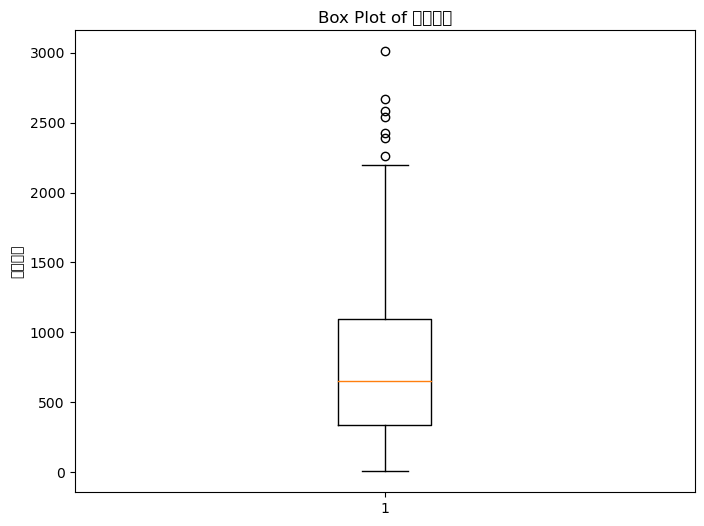

C:\Users\shjo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shjo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shjo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


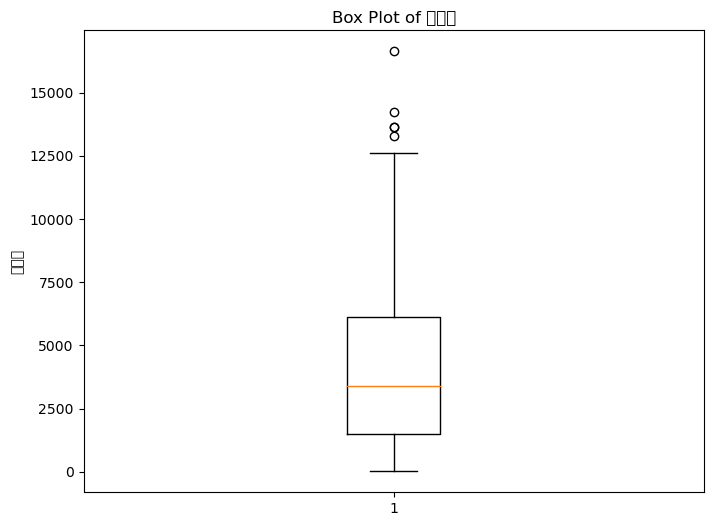

In [7]:
# 모든 int64 데이터 열에 대한 박스 플롯 시각화
for column in building.select_dtypes(include=['int64']):
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

# 신사동 분리

In [7]:
df = pd.read_csv('데이터/단독주택_아파트수.csv')
df

,동별(3),단독주택,아파트
0,사직동,650,1591
1,삼청동,644,654
2,부암동,1033,121
3,평창동,1553,1009
4,무악동,48,2703
...,...,...,...
416,둔촌1동,5,6868
417,둔촌2동,543,5011
418,암사1동,1139,2790
419,천호2동,1488,2641


In [8]:
len(df['동별(3)'].unique())

421

In [9]:
dong = pd.read_csv('데이터/신사동분리버전행정동코드.csv')
dong

,ADSTRD_CD_x,ADSTRD_NM,ADSTRD_CD_y
0,1101053,사직동,11110530
1,1101054,삼청동,11110540
2,1101055,부암동,11110550
3,1101056,평창동,11110560
4,1101057,무악동,11110570
...,...,...,...
416,1125070,둔촌1동,11740690
417,1125071,둔촌2동,11740700
418,1125072,암사1동,11740570
419,1125073,천호2동,11740610


In [10]:
a = set(df['동별(3)'].unique())
b = set(dong['ADSTRD_NM'].unique())
a^b
# .과 ·이 다름

{'금호2.3가동',
 '금호2·3가동',
 '면목3.8동',
 '면목3·8동',
 '상계3.4동',
 '상계3·4동',
 '상계6.7동',
 '상계6·7동',
 '종로1.2.3.4가동',
 '종로1·2·3·4가동',
 '종로5.6가동',
 '종로5·6가동',
 '중계2.3동',
 '중계2·3동'}

In [11]:
dong_dic = {
    '금호2.3가동':'금호2·3가동',
    '면목3.8동':'면목3·8동',
    '면목제3.8동':'면목3·8동',
    '상계3.4동':'상계3·4동',
    '상계6.7동':'상계6·7동',
    '종로1.2.3.4가동':'종로1·2·3·4가동',
    '종로5.6가동':'종로5·6가동',
    '중계2.3동':'중계2·3동'
}
# .을 ·으로 변경
def apply_mapping(value):
    if value in dong_dic:
        return dong_dic[value]
    return value
df['동별(3)'] = df['동별(3)'].apply(apply_mapping)

In [12]:
# 신사동 분리 완료
df1 = pd.merge(df,dong,how='inner',left_on='동별(3)',right_on='ADSTRD_NM')
df1

,동별(3),단독주택,아파트,ADSTRD_CD_x,ADSTRD_NM,ADSTRD_CD_y
0,사직동,650,1591,1101053,사직동,11110530
1,삼청동,644,654,1101054,삼청동,11110540
2,부암동,1033,121,1101055,부암동,11110550
3,평창동,1553,1009,1101056,평창동,11110560
4,무악동,48,2703,1101057,무악동,11110570
...,...,...,...,...,...,...
416,둔촌1동,5,6868,1125070,둔촌1동,11740690
417,둔촌2동,543,5011,1125071,둔촌2동,11740700
418,암사1동,1139,2790,1125072,암사1동,11740570
419,천호2동,1488,2641,1125073,천호2동,11740610


In [13]:
df1.to_csv('단독주택_아파트수.csv',index=False)